## info, comment dataset 합치기

In [ ]:
import time 
import re 
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_info = pd.read_csv("total.csv", encoding='utf-8-sig')
data_info

id  cast          name     sub  \
0        0  game  G-ZONE 게임은지원  143000   
1        1  game  G-ZONE 게임은지원  143000   
2        2  game  G-ZONE 게임은지원  143000   
3        3  game  G-ZONE 게임은지원  143000   
4        4  game  G-ZONE 게임은지원  143000   
...    ...   ...           ...     ...   
7621  7621  game          테드TV  968000   
7622  7622  game          테드TV  968000   
7623  7623  game          테드TV  968000   
7624  7624  game          테드TV  968000   
7625  7625  game          테드TV  968000   

                                                  title   like  hate     view  \
0     어몽어스에서 팬미팅한 은지원ㅋㅋㅋㅋ 팬바보 은지원이 손절한 이유는?!🤭🤭 | 어몽어...   3700    38   184975   
1     이제부터 은지원 아니고 홀인원으로 불러주세요⛳ 게임은지원 골프실력 전격공개! | 퍼...   1300     6    95850   
2     [ENG]드디어 정했습니다😎 은지원이 직접 선택한 구독자 애칭 공개!!! | 게임은...   1900     8    21377   
3     매운맛 은지원VS순한맛 은지원! 당신의 선택에 따라 볼 수 있는 게임은지원😎|롤|L...   1300     7    60877   
4     [ENG]신발장사 할 거야? 승리를 위해 신발만 사는 은지원의 상황별 아이템 정리 ...   2000    61   203760   
...                                                 ...    ...   ...      ...   
7621                 1:1:1 이런경우들 많이있죠?? 같이 극복해봅시다 브롤스타즈   3500   131   402779   
7622                        불, 쉘리 다 있죠? 이맵에서 꿀빠세요 브롤스타즈   2400    90   276996   
7623               매우 아픈 스파이크 500+에서 직접 플레이 해봤습니다 브롤스타즈   5000   210   724722   
7624                     물주면 3뚝 주는 나무가 있네.. 직접 확인해봐야겠지?   1800    97   204517   
7625        막 만든 1렙 계정에 100만원 상자 오픈 해봤습니다 흠 전설뜨네? 브롤스타즈  51000  4300  8010131   

      ad                                          url  
0      0  https://www.youtube.com/watch?v=wn-kMYIEWsQ  
1      1  https://www.youtube.com/watch?v=hMp7D4km5n4  
2      0  https://www.youtube.com/watch?v=HUR2m_whlWg  
3      0  https://www.youtube.com/watch?v=CGfrWv-jUy8  
4      0  https://www.youtube.com/watch?v=9YN7mymMWqY  
...   ..                                          ...  
7621   0  https://www.youtube.com/watch?v=oDsNyWWf_C4  
7622   1  https://www.youtube.com/watch?v=1InjswoRDzQ  
7623   1  https://www.youtube.com/watch?v=BVUjyHnEmZc  
7624   0  https://www.youtube.com/watch?v=oRpxYraOm48  
7625   1  https://www.youtube.com/watch?v=gsGfCIdWvfw  

[7626 rows x 10 columns]

In [ ]:
data_comment = pd.read_csv('comm_list.csv', encoding='utf-8-sig')
data_comment

id          name                                              title  \
0        0  G-ZONE 게임은지원  어몽어스에서 팬미팅한 은지원ㅋㅋㅋㅋ 팬바보 은지원이 손절한 이유는?!🤭🤭 | 어몽어...   
1        1  G-ZONE 게임은지원  이제부터 은지원 아니고 홀인원으로 불러주세요⛳ 게임은지원 골프실력 전격공개! | 퍼...   
2        2  G-ZONE 게임은지원  [ENG]드디어 정했습니다😎 은지원이 직접 선택한 구독자 애칭 공개!!! | 게임은...   
3        3  G-ZONE 게임은지원  매운맛 은지원VS순한맛 은지원! 당신의 선택에 따라 볼 수 있는 게임은지원😎|롤|L...   
4        4  G-ZONE 게임은지원  [ENG]신발장사 할 거야? 승리를 위해 신발만 사는 은지원의 상황별 아이템 정리 ...   
...    ...           ...                                                ...   
7621  7621          테드TV                 1:1:1 이런경우들 많이있죠?? 같이 극복해봅시다 브롤스타즈   
7622  7622          테드TV                        불, 쉘리 다 있죠? 이맵에서 꿀빠세요 브롤스타즈   
7623  7623          테드TV               매우 아픈 스파이크 500+에서 직접 플레이 해봤습니다 브롤스타즈   
7624  7624          테드TV                     물주면 3뚝 주는 나무가 있네.. 직접 확인해봐야겠지?   
7625  7625          테드TV        막 만든 1렙 계정에 100만원 상자 오픈 해봤습니다 흠 전설뜨네? 브롤스타즈   

                                              url  \
0     https://www.youtube.com/watch?v=wn-kMYIEWsQ   
1     https://www.youtube.com/watch?v=hMp7D4km5n4   
2     https://www.youtube.com/watch?v=HUR2m_whlWg   
3     https://www.youtube.com/watch?v=CGfrWv-jUy8   
4     https://www.youtube.com/watch?v=9YN7mymMWqY   
...                                           ...   
7621  https://www.youtube.com/watch?v=oDsNyWWf_C4   
7622  https://www.youtube.com/watch?v=1InjswoRDzQ   
7623  https://www.youtube.com/watch?v=BVUjyHnEmZc   
7624  https://www.youtube.com/watch?v=oRpxYraOm48   
7625  https://www.youtube.com/watch?v=gsGfCIdWvfw   

                                                comment  
0     게임 같이 했던 강호동 컨셉충이었습니다 ㅋ\n\n편집 본 언제 올라오나 기다리고 있...  
1     [게임은지원 X 퍼펙트스윙] 이벤트 발표\n당첨을 진심으로 축하드립니다~!!!🥳🥳\...  
2     게임은지원을 위해 반짝이는 아이디어를 내주신 모든 구독자 여러분 감사드립니다🥰\n"...  
3     찌오니 은배려인거 당연히 알죠❤ 신중한거 잘아는 원카인을 아는 은지원이니까 원카인이...  
4     서버가 불안정 하다뇨,,,ㅠ 은지원 미모 실화냐ㄷㄷ 신서유기 용볼게임이랑 롤이다ㅋㅋ...  
...                                                 ...  
7621  상황판단 지렸다리 10:11 본인이 포코 리뷰할때 말함... 다른거 이해가 되는데 ...  
7622  요즘 30대분들도 브롤 많이하네 흠 0:21 우당탕 진흙탕 ㅋㅋㅋㅋㅋ 0:00 아~...  
7623  1 쓰는놈들 형이 다 뚜까팬다 방금 브롤 상자에서 스파이크 떴네용 ㅎㅋㅎㅋㅎㅋㅋㅋㅋ...  
7624  한배도 참신한거 많이 업뎃좀 해주셈.. 2:41  뚝배기맞음 7:52 신기하네~ 나...  
7625  클래시로얄 초창기 : 전설 3대장 시절 (프린세스, 얼음 마법사, 광부) 만렙 찍으...  

[7626 rows x 5 columns]

In [ ]:
comment = data_comment[['url', 'comment']]

In [ ]:
df_INNER_JOIN = pd.merge(data_info, comment, left_on='url', right_on='url', how='inner')
df_INNER_JOIN

id  cast          name     sub  \
0        0  game  G-ZONE 게임은지원  143000   
1        1  game  G-ZONE 게임은지원  143000   
2        2  game  G-ZONE 게임은지원  143000   
3        3  game  G-ZONE 게임은지원  143000   
4        4  game  G-ZONE 게임은지원  143000   
...    ...   ...           ...     ...   
7621  7621  game          테드TV  968000   
7622  7622  game          테드TV  968000   
7623  7623  game          테드TV  968000   
7624  7624  game          테드TV  968000   
7625  7625  game          테드TV  968000   

                                                  title   like  hate     view  \
0     어몽어스에서 팬미팅한 은지원ㅋㅋㅋㅋ 팬바보 은지원이 손절한 이유는?!🤭🤭 | 어몽어...   3700    38   184975   
1     이제부터 은지원 아니고 홀인원으로 불러주세요⛳ 게임은지원 골프실력 전격공개! | 퍼...   1300     6    95850   
2     [ENG]드디어 정했습니다😎 은지원이 직접 선택한 구독자 애칭 공개!!! | 게임은...   1900     8    21377   
3     매운맛 은지원VS순한맛 은지원! 당신의 선택에 따라 볼 수 있는 게임은지원😎|롤|L...   1300     7    60877   
4     [ENG]신발장사 할 거야? 승리를 위해 신발만 사는 은지원의 상황별 아이템 정리 ...   2000    61   203760   
...                                                 ...    ...   ...      ...   
7621                 1:1:1 이런경우들 많이있죠?? 같이 극복해봅시다 브롤스타즈   3500   131   402779   
7622                        불, 쉘리 다 있죠? 이맵에서 꿀빠세요 브롤스타즈   2400    90   276996   
7623               매우 아픈 스파이크 500+에서 직접 플레이 해봤습니다 브롤스타즈   5000   210   724722   
7624                     물주면 3뚝 주는 나무가 있네.. 직접 확인해봐야겠지?   1800    97   204517   
7625        막 만든 1렙 계정에 100만원 상자 오픈 해봤습니다 흠 전설뜨네? 브롤스타즈  51000  4300  8010131   

      ad                                          url  \
0      0  https://www.youtube.com/watch?v=wn-kMYIEWsQ   
1      1  https://www.youtube.com/watch?v=hMp7D4km5n4   
2      0  https://www.youtube.com/watch?v=HUR2m_whlWg   
3      0  https://www.youtube.com/watch?v=CGfrWv-jUy8   
4      0  https://www.youtube.com/watch?v=9YN7mymMWqY   
...   ..                                          ...   
7621   0  https://www.youtube.com/watch?v=oDsNyWWf_C4   
7622   1  https://www.youtube.com/watch?v=1InjswoRDzQ   
7623   1  https://www.youtube.com/watch?v=BVUjyHnEmZc   
7624   0  https://www.youtube.com/watch?v=oRpxYraOm48   
7625   1  https://www.youtube.com/watch?v=gsGfCIdWvfw   

                                                comment  
0     게임 같이 했던 강호동 컨셉충이었습니다 ㅋ\n\n편집 본 언제 올라오나 기다리고 있...  
1     [게임은지원 X 퍼펙트스윙] 이벤트 발표\n당첨을 진심으로 축하드립니다~!!!🥳🥳\...  
2     게임은지원을 위해 반짝이는 아이디어를 내주신 모든 구독자 여러분 감사드립니다🥰\n"...  
3     찌오니 은배려인거 당연히 알죠❤ 신중한거 잘아는 원카인을 아는 은지원이니까 원카인이...  
4     서버가 불안정 하다뇨,,,ㅠ 은지원 미모 실화냐ㄷㄷ 신서유기 용볼게임이랑 롤이다ㅋㅋ...  
...                                                 ...  
7621  상황판단 지렸다리 10:11 본인이 포코 리뷰할때 말함... 다른거 이해가 되는데 ...  
7622  요즘 30대분들도 브롤 많이하네 흠 0:21 우당탕 진흙탕 ㅋㅋㅋㅋㅋ 0:00 아~...  
7623  1 쓰는놈들 형이 다 뚜까팬다 방금 브롤 상자에서 스파이크 떴네용 ㅎㅋㅎㅋㅎㅋㅋㅋㅋ...  
7624  한배도 참신한거 많이 업뎃좀 해주셈.. 2:41  뚝배기맞음 7:52 신기하네~ 나...  
7625  클래시로얄 초창기 : 전설 3대장 시절 (프린세스, 얼음 마법사, 광부) 만렙 찍으...  

[7626 rows x 11 columns]

In [ ]:
df_INNER_JOIN.to_csv("df_INNER_JOIN.csv", encoding='utf-8-sig')

In [ ]:
# not ad
not_ad_df = df_INNER_JOIN[df_INNER_JOIN['ad'] == 0]

In [ ]:
not_ad_df

id  cast          name     sub  \
0        0  game  G-ZONE 게임은지원  143000   
2        2  game  G-ZONE 게임은지원  143000   
3        3  game  G-ZONE 게임은지원  143000   
4        4  game  G-ZONE 게임은지원  143000   
5        5  game  G-ZONE 게임은지원  143000   
...    ...   ...           ...     ...   
7614  7614  game          테드TV  968000   
7618  7618  game          테드TV  968000   
7619  7619  game          테드TV  968000   
7621  7621  game          테드TV  968000   
7624  7624  game          테드TV  968000   

                                                  title  like  hate     view  \
0     어몽어스에서 팬미팅한 은지원ㅋㅋㅋㅋ 팬바보 은지원이 손절한 이유는?!🤭🤭 | 어몽어...  3700    38   184975   
2     [ENG]드디어 정했습니다😎 은지원이 직접 선택한 구독자 애칭 공개!!! | 게임은...  1900     8    21377   
3     매운맛 은지원VS순한맛 은지원! 당신의 선택에 따라 볼 수 있는 게임은지원😎|롤|L...  1300     7    60877   
4     [ENG]신발장사 할 거야? 승리를 위해 신발만 사는 은지원의 상황별 아이템 정리 ...  2000    61   203760   
5     [ENG] 벼르고 은지원을 죽인 상상도 못한 임포스터 정체는 누구?! | 어몽어스 ...  5700    57   267097   
...                                                 ...   ...   ...      ...   
7614                   크로우가 쓰레기? 한국 1위 크로우 보여드립니다 브롤스타즈  7200   403  1222181   
7618                    스타파워 첫 구입 고민되시나요? 바로 이겁니다 브롤스타즈  3600   149   499682   
7619                        1레벨 쉘리로 500점 가봤습니다 응? 브롤스타즈  9500   484  1016229   
7621                 1:1:1 이런경우들 많이있죠?? 같이 극복해봅시다 브롤스타즈  3500   131   402779   
7624                     물주면 3뚝 주는 나무가 있네.. 직접 확인해봐야겠지?  1800    97   204517   

      ad                                          url  \
0      0  https://www.youtube.com/watch?v=wn-kMYIEWsQ   
2      0  https://www.youtube.com/watch?v=HUR2m_whlWg   
3      0  https://www.youtube.com/watch?v=CGfrWv-jUy8   
4      0  https://www.youtube.com/watch?v=9YN7mymMWqY   
5      0  https://www.youtube.com/watch?v=nBIoKwlcz-c   
...   ..                                          ...   
7614   0  https://www.youtube.com/watch?v=Vd6xq0tlGWs   
7618   0  https://www.youtube.com/watch?v=Kyxm63VSzjI   
7619   0  https://www.youtube.com/watch?v=ffraE0Z4xG8   
7621   0  https://www.youtube.com/watch?v=oDsNyWWf_C4   
7624   0  https://www.youtube.com/watch?v=oRpxYraOm48   

                                                comment  
0     게임 같이 했던 강호동 컨셉충이었습니다 ㅋ\n\n편집 본 언제 올라오나 기다리고 있...  
2     게임은지원을 위해 반짝이는 아이디어를 내주신 모든 구독자 여러분 감사드립니다🥰\n"...  
3     찌오니 은배려인거 당연히 알죠❤ 신중한거 잘아는 원카인을 아는 은지원이니까 원카인이...  
4     서버가 불안정 하다뇨,,,ㅠ 은지원 미모 실화냐ㄷㄷ 신서유기 용볼게임이랑 롤이다ㅋㅋ...  
5     은몽원스 와..한턴에 4킬 실화야? 장소도 여기저기인데 발견 못한것도 레전드다ㅋㅋㅋ...  
...                                                 ...  
7614  오늘 3시에 브롤 상자에서 스파이크 떳습니다. 기 받아가던가 크로우고 뭐고 전설캐 ...  
7618  보의 스타파워는 사기다 & 아니다 여기있는사람90퍼센트이상이 스타파워고민은커녕 아직...  
7619  레쯔 ㅂ뢀~!! 아니 ㅋㅋ 얘두라 6렙에서 한 방 때리고 붙어서3방 당연히 좋지 형...  
7621  상황판단 지렸다리 10:11 본인이 포코 리뷰할때 말함... 다른거 이해가 되는데 ...  
7624  한배도 참신한거 많이 업뎃좀 해주셈.. 2:41  뚝배기맞음 7:52 신기하네~ 나...  

[7286 rows x 11 columns]

In [ ]:
not_ad_df.to_csv("not_ad_df.csv", encoding='utf-8-sig')

In [ ]:
# not ad
ad_df = df_INNER_JOIN[df_INNER_JOIN['ad'] == 1]

In [ ]:
ad_df

id  cast          name     sub  \
1        1  game  G-ZONE 게임은지원  143000   
7        7  game  G-ZONE 게임은지원  143000   
13      13  game  G-ZONE 게임은지원  143000   
14      14  game  G-ZONE 게임은지원  143000   
15      15  game  G-ZONE 게임은지원  143000   
...    ...   ...           ...     ...   
7617  7617  game          테드TV  968000   
7620  7620  game          테드TV  968000   
7622  7622  game          테드TV  968000   
7623  7623  game          테드TV  968000   
7625  7625  game          테드TV  968000   

                                                  title   like  hate     view  \
1     이제부터 은지원 아니고 홀인원으로 불러주세요⛳ 게임은지원 골프실력 전격공개! | 퍼...   1300     6    95850   
7     아이들 히어로즈 뽑기 공략법 아시는 분?! 뽑는 거 마다 꽝! 우리 뽀록왕이 달라졌...   1500    10   125631   
13        [FULL ver.] 게임은지원 바람의나라: 연 라이브 풀영상 | 바람의나라: 연   1100    12    21629   
14    [EN/CN] 게임부심 형제도 협동하게 만든 바람의나라:연 레이드 도전! 아... ...   1900    23   215105   
15    [EN/CN] 바람의나라: 연 레이드 공략법 공개✨ 넥슨아... 다람쥐를 뿌리라고 ...   2400    43   271172   
...                                                 ...    ...   ...      ...   
7617                              ??? : 대릴이 대릴했네. 브롤스타즈   5300   263   619163   
7620                                 브롤할때입은 의상 공개합니다 하앍   1300    56    51588   
7622                        불, 쉘리 다 있죠? 이맵에서 꿀빠세요 브롤스타즈   2400    90   276996   
7623               매우 아픈 스파이크 500+에서 직접 플레이 해봤습니다 브롤스타즈   5000   210   724722   
7625        막 만든 1렙 계정에 100만원 상자 오픈 해봤습니다 흠 전설뜨네? 브롤스타즈  51000  4300  8010131   

      ad                                          url  \
1      1  https://www.youtube.com/watch?v=hMp7D4km5n4   
7      1  https://www.youtube.com/watch?v=pNnOC6Infz4   
13     1  https://www.youtube.com/watch?v=gntBoD6-3pI   
14     1  https://www.youtube.com/watch?v=aprDDCUC9r8   
15     1  https://www.youtube.com/watch?v=Qugi0jNTrK0   
...   ..                                          ...   
7617   1  https://www.youtube.com/watch?v=msY1Fs48H1g   
7620   1  https://www.youtube.com/watch?v=-TbuWtmeb9c   
7622   1  https://www.youtube.com/watch?v=1InjswoRDzQ   
7623   1  https://www.youtube.com/watch?v=BVUjyHnEmZc   
7625   1  https://www.youtube.com/watch?v=gsGfCIdWvfw   

                                                comment  
1     [게임은지원 X 퍼펙트스윙] 이벤트 발표\n당첨을 진심으로 축하드립니다~!!!🥳🥳\...  
7     은대장이 처돌아버린 게임, 요기서 받을 수 있지원 👇\nhttps://krpr.on...  
13    잘생긴 은지원이 게임을 재밌게 하는 풀영상이라니! 비오는 날 듣기 좋은 은지원의 m...  
14    이날 샵 다녀오신 지존님 존잘력 뿜뿜 👍🏽👍🏽 바람의 나라 겜하는 은지원 보는 게 ...  
15    강호동님한테 게임가르치기 콘텐츠 함 해줘요 오늘 영상은 원카인들 힐링영상이네요 감사...  
...                                                 ...  
7617  대릴 싫은분 좋아요 수 좀 보자 한 번 저 오늘 브롤상자에서 레온이랑 파이퍼 뽑았습...  
7620  영상 오류로 인한 재 업로드 입니다 죄송 (_ _) 우측 상단 ! 클릭하셔서 맘에드...  
7622  요즘 30대분들도 브롤 많이하네 흠 0:21 우당탕 진흙탕 ㅋㅋㅋㅋㅋ 0:00 아~...  
7623  1 쓰는놈들 형이 다 뚜까팬다 방금 브롤 상자에서 스파이크 떴네용 ㅎㅋㅎㅋㅎㅋㅋㅋㅋ...  
7625  클래시로얄 초창기 : 전설 3대장 시절 (프린세스, 얼음 마법사, 광부) 만렙 찍으...  

[340 rows x 11 columns]

In [ ]:
ad_df.to_csv("ad_df.csv", encoding='utf-8-sig')

## 시각화

In [ ]:
# 데이터셋 불러오기

total = pd.read_csv("data.csv", encoding='utf-8-sig')

In [ ]:
total 

id  cast          name     sub  \
0        0  game  G-ZONE 게임은지원  143000   
1        1  game  G-ZONE 게임은지원  143000   
2        2  game  G-ZONE 게임은지원  143000   
3        3  game  G-ZONE 게임은지원  143000   
4        4  game  G-ZONE 게임은지원  143000   
5        5  game  G-ZONE 게임은지원  143000   
6        6  game  G-ZONE 게임은지원  143000   
7        7  game  G-ZONE 게임은지원  143000   
8        8  game  G-ZONE 게임은지원  143000   
9        9  game  G-ZONE 게임은지원  143000   
10      10  game  G-ZONE 게임은지원  143000   
11      11  game  G-ZONE 게임은지원  143000   
12      12  game  G-ZONE 게임은지원  143000   
13      13  game  G-ZONE 게임은지원  143000   
14      14  game  G-ZONE 게임은지원  143000   
15      15  game  G-ZONE 게임은지원  143000   
16      16  game  G-ZONE 게임은지원  143000   
17      17  game  G-ZONE 게임은지원  143000   
18      18  game  G-ZONE 게임은지원  143000   
19      19  game  G-ZONE 게임은지원  143000   
20      20  game  G-ZONE 게임은지원  143000   
21      21  game  G-ZONE 게임은지원  143000   
22      22  game  G-ZONE 게임은지원  143000   
23      23  game  G-ZONE 게임은지원  143000   
24      24  game  G-ZONE 게임은지원  143000   
25      25  game  G-ZONE 게임은지원  143000   
26      26  game  G-ZONE 게임은지원  143000   
27      27  game  G-ZONE 게임은지원  143000   
28      28  game  G-ZONE 게임은지원  143000   
29      29  game  G-ZONE 게임은지원  143000   
...    ...   ...           ...     ...   
7596  7596  game          테드TV  968000   
7597  7597  game          테드TV  968000   
7598  7598  game          테드TV  968000   
7599  7599  game          테드TV  968000   
7600  7600  game          테드TV  968000   
7601  7601  game          테드TV  968000   
7602  7602  game          테드TV  968000   
7603  7603  game          테드TV  968000   
7604  7604  game          테드TV  968000   
7605  7605  game          테드TV  968000   
7606  7606  game          테드TV  968000   
7607  7607  game          테드TV  968000   
7608  7608  game          테드TV  968000   
7609  7609  game          테드TV  968000   
7610  7610  game          테드TV  968000   
7611  7611  game          테드TV  968000   
7612  7612  game          테드TV  968000   
7613  7613  game          테드TV  968000   
7614  7614  game          테드TV  968000   
7615  7615  game          테드TV  968000   
7616  7616  game          테드TV  968000   
7617  7617  game          테드TV  968000   
7618  7618  game          테드TV  968000   
7619  7619  game          테드TV  968000   
7620  7620  game          테드TV  968000   
7621  7621  game          테드TV  968000   
7622  7622  game          테드TV  968000   
7623  7623  game          테드TV  968000   
7624  7624  game          테드TV  968000   
7625  7625  game          테드TV  968000   

                                                  title   like  hate     view  \
0     어몽어스에서 팬미팅한 은지원ㅋㅋㅋㅋ 팬바보 은지원이 손절한 이유는?!???? | 어...   3700    38   184975   
1     이제부터 은지원 아니고 홀인원으로 불러주세요? 게임은지원 골프실력 전격공개! | 퍼...   1300     6    95850   
2     [ENG]드디어 정했습니다?? 은지원이 직접 선택한 구독자 애칭 공개!!! | 게임...   1900     8    21377   
3     매운맛 은지원VS순한맛 은지원! 당신의 선택에 따라 볼 수 있는 게임은지원??|롤|...   1300     7    60877   
4     [ENG]신발장사 할 거야? 승리를 위해 신발만 사는 은지원의 상황별 아이템 정리 ...   2000    61   203760   
5     [ENG] 벼르고 은지원을 죽인 상상도 못한 임포스터 정체는 누구?! | 어몽어스 ...   5700    57   267097   
6     [ENG] 어몽어스하면서 절대 하면 안되는 경우의 수 다 모였음ㅋㅋㅋ | 게임은지원...  11000   160   703817   
7     아이들 히어로즈 뽑기 공략법 아시는 분?! 뽑는 거 마다 꽝! 우리 뽀록왕이 달라졌...   1500    10   125631   
8     [EN/CN] 둘이 시작하고 혼자 끝낸다는 레전드 절교게임 리뷰^^ (오늘도 열일하...   3500    21   133761   
9     [EN/CN] 본격 머리끄덩이 게임????소리만 지르다 시간 순삭된 찌오니의 폴 가...   5200   107   330787   
10    [EN/CN] 역시 될놈될... 꼼수써서 탈출한 은대장의 포탈 공략법 | 게임은지원...   2200    12   105168   
11    [EN/CN] ※실제상황※ 공포게임 시작하자마자 컴퓨터가 꺼지다니 ㅎㄷㄷ... | ...   2300    16    92530   
12    [EN/CN]???♂???♂걷기만 해도 웃긴 거 실화??? 이렇게 힘없는 게임은 처...   4100    21   214876   
13        [FULL ver.] 게임은지원 바람의나라: 연 라이브 풀영상 | 바람의나라: 연   1100    12    21629   
14    [EN/CN] 게임부심 형제도 협동하게 만든 바람의나라:연 레이드 도전! 아... ...   1900    23   215105   
15    [EN/CN] 바람의나라: 연 레이드 공략법 공개? 넥슨아... 다람쥐를 뿌리라고 ...   2400    43   271172   
16             [FULL ver.]

In [ ]:
ad_df = total.loc[total['ad'] == 1]

In [ ]:
ad_df

id  cast          name      sub  \
1        1  game  G-ZONE 게임은지원   143000   
7        7  game  G-ZONE 게임은지원   143000   
13      13  game  G-ZONE 게임은지원   143000   
14      14  game  G-ZONE 게임은지원   143000   
15      15  game  G-ZONE 게임은지원   143000   
16      16  game  G-ZONE 게임은지원   143000   
17      17  game  G-ZONE 게임은지원   143000   
18      18  game  G-ZONE 게임은지원   143000   
19      19  game  G-ZONE 게임은지원   143000   
20      20  game  G-ZONE 게임은지원   143000   
22      22  game  G-ZONE 게임은지원   143000   
23      23  game  G-ZONE 게임은지원   143000   
24      24  game  G-ZONE 게임은지원   143000   
25      25  game  G-ZONE 게임은지원   143000   
54      54  game         배룡 TV   104000   
55      55  game         배룡 TV   104000   
56      56  game         배룡 TV   104000   
57      57  game         배룡 TV   104000   
58      58  game         배룡 TV   104000   
59      59  game         배룡 TV   104000   
60      60  game         배룡 TV   104000   
61      61  game         배룡 TV   104000   
62      62  game         배룡 TV   104000   
63      63  game         배룡 TV   104000   
64      64  game         배룡 TV   104000   
65      65  game         배룡 TV   104000   
71      71  game         배룡 TV   104000   
140    140  game         배룡 TV   104000   
145    145  game         배룡 TV   104000   
225    225  game     우왁굳의 게임방송  1090000   
...    ...   ...           ...      ...   
7388  7388  game          테드TV   968000   
7391  7391  game          테드TV   968000   
7394  7394  game          테드TV   968000   
7396  7396  game          테드TV   968000   
7399  7399  game          테드TV   968000   
7400  7400  game          테드TV   968000   
7401  7401  game          테드TV   968000   
7402  7402  game          테드TV   968000   
7403  7403  game          테드TV   968000   
7405  7405  game          테드TV   968000   
7406  7406  game          테드TV   968000   
7419  7419  game          테드TV   968000   
7429  7429  game          테드TV   968000   
7437  7437  game          테드TV   968000   
7487  7487  game          테드TV   968000   
7495  7495  game          테드TV   968000   
7574  7574  game          테드TV   968000   
7578  7578  game          테드TV   968000   
7580  7580  game          테드TV   968000   
7582  7582  game          테드TV   968000   
7587  7587  game          테드TV   968000   
7589  7589  game          테드TV   968000   
7590  7590  game          테드TV   968000   
7615  7615  game          테드TV   968000   
7616  7616  game          테드TV   968000   
7617  7617  game          테드TV   968000   
7620  7620  game          테드TV   968000   
7622  7622  game          테드TV   968000   
7623  7623  game          테드TV   968000   
7625  7625  game          테드TV   968000   

                                                  title   like  hate     view  \
1     이제부터 은지원 아니고 홀인원으로 불러주세요? 게임은지원 골프실력 전격공개! | 퍼...   1300     6    95850   
7     아이들 히어로즈 뽑기 공략법 아시는 분?! 뽑는 거 마다 꽝! 우리 뽀록왕이 달라졌...   1500    10   125631   
13        [FULL ver.] 게임은지원 바람의나라: 연 라이브 풀영상 | 바람의나라: 연   1100    12    21629   
14    [EN/CN] 게임부심 형제도 협동하게 만든 바람의나라:연 레이드 도전! 아... ...   1900    23   215105   
15    [EN/CN] 바람의나라: 연 레이드 공략법 공개? 넥슨아... 다람쥐를 뿌리라고 ...   2400    43   271172   
16             [FULL ver.] 게임은지원 명일방주 라이브 2탄 풀영상 | 명일방주   1100     7    20024   
17    [EN/CN] 명일방주 섬멸전이라 쓰고 본격 개꿀잼이라 말한다?섬멸전 공략법 줍줍하...   1900    13   203733   
18    [EN] 은지원 제대로 플렉스하다?! ????뉴비였던 실버지원의 달라진 명방생활 |...   1900    17   204596   
19             [FULL ver.] 게임은지원 명일방주 라이브 1탄 풀영상 | 명일방주   1300     9    21059   
20    [EN] 명일방주에서 살아남는 6성 뽑기 공략? 소통하지 않는 찌워니와 소리치는 2...   2100    19   209434   
22    [EN] 이기면 내탓 지면 네탓, 남탓이 난무하는 팀 게임은콩커의 룬테라 토너먼트 ...   1800    14   199936   
23    [EN] 이 실력으로 지금 잠이 옵니까?! 발등에 코끼리 똥 떨어진 은지원의 험난한...   2100    13   201510   
24    [EN] 원래 뭐 걸고 하는 '쪼랩대전'이 세상 젤 재밌는 거 아니겠습니까~ 긴장감...   2600    20   231210   
25    [EN] 평화롭던 게임계의 G-ZONE을 위협하는 콩&코의 습격?! 레전드 오브 룬...   4500    66   313145   
54    (광고) 뽑기없는 세븐나이츠 타임 원더러 완벽 리뷰! 닌텐도 스위치에서! #닌텐도스...     69     9    10482   
55             배룡의 세븐나이츠2 스토리 예측! 세나2에서는 어떤 일

In [ ]:
not_ad_df = total.loc[total['ad'] == 0]

In [ ]:
not_ad_df

id  cast          name     sub  \
0        0  game  G-ZONE 게임은지원  143000   
2        2  game  G-ZONE 게임은지원  143000   
3        3  game  G-ZONE 게임은지원  143000   
4        4  game  G-ZONE 게임은지원  143000   
5        5  game  G-ZONE 게임은지원  143000   
6        6  game  G-ZONE 게임은지원  143000   
8        8  game  G-ZONE 게임은지원  143000   
9        9  game  G-ZONE 게임은지원  143000   
10      10  game  G-ZONE 게임은지원  143000   
11      11  game  G-ZONE 게임은지원  143000   
12      12  game  G-ZONE 게임은지원  143000   
21      21  game  G-ZONE 게임은지원  143000   
26      26  game  G-ZONE 게임은지원  143000   
27      27  game  G-ZONE 게임은지원  143000   
28      28  game  G-ZONE 게임은지원  143000   
29      29  game  G-ZONE 게임은지원  143000   
30      30  game  G-ZONE 게임은지원  143000   
31      31  game  G-ZONE 게임은지원  143000   
32      32  game  G-ZONE 게임은지원  143000   
33      33  game  G-ZONE 게임은지원  143000   
34      34  game  G-ZONE 게임은지원  143000   
35      35  game  G-ZONE 게임은지원  143000   
36      36  game  G-ZONE 게임은지원  143000   
37      37  game  G-ZONE 게임은지원  143000   
38      38  game  G-ZONE 게임은지원  143000   
39      39  game  G-ZONE 게임은지원  143000   
40      40  game  G-ZONE 게임은지원  143000   
41      41  game  G-ZONE 게임은지원  143000   
42      42  game  G-ZONE 게임은지원  143000   
43      43  game  G-ZONE 게임은지원  143000   
...    ...   ...           ...     ...   
7586  7586  game          테드TV  968000   
7588  7588  game          테드TV  968000   
7591  7591  game          테드TV  968000   
7592  7592  game          테드TV  968000   
7593  7593  game          테드TV  968000   
7594  7594  game          테드TV  968000   
7595  7595  game          테드TV  968000   
7596  7596  game          테드TV  968000   
7597  7597  game          테드TV  968000   
7598  7598  game          테드TV  968000   
7599  7599  game          테드TV  968000   
7600  7600  game          테드TV  968000   
7601  7601  game          테드TV  968000   
7602  7602  game          테드TV  968000   
7603  7603  game          테드TV  968000   
7604  7604  game          테드TV  968000   
7605  7605  game          테드TV  968000   
7606  7606  game          테드TV  968000   
7607  7607  game          테드TV  968000   
7608  7608  game          테드TV  968000   
7609  7609  game          테드TV  968000   
7610  7610  game          테드TV  968000   
7611  7611  game          테드TV  968000   
7612  7612  game          테드TV  968000   
7613  7613  game          테드TV  968000   
7614  7614  game          테드TV  968000   
7618  7618  game          테드TV  968000   
7619  7619  game          테드TV  968000   
7621  7621  game          테드TV  968000   
7624  7624  game          테드TV  968000   

                                                  title   like  hate     view  \
0     어몽어스에서 팬미팅한 은지원ㅋㅋㅋㅋ 팬바보 은지원이 손절한 이유는?!???? | 어...   3700    38   184975   
2     [ENG]드디어 정했습니다?? 은지원이 직접 선택한 구독자 애칭 공개!!! | 게임...   1900     8    21377   
3     매운맛 은지원VS순한맛 은지원! 당신의 선택에 따라 볼 수 있는 게임은지원??|롤|...   1300     7    60877   
4     [ENG]신발장사 할 거야? 승리를 위해 신발만 사는 은지원의 상황별 아이템 정리 ...   2000    61   203760   
5     [ENG] 벼르고 은지원을 죽인 상상도 못한 임포스터 정체는 누구?! | 어몽어스 ...   5700    57   267097   
6     [ENG] 어몽어스하면서 절대 하면 안되는 경우의 수 다 모였음ㅋㅋㅋ | 게임은지원...  11000   160   703817   
8     [EN/CN] 둘이 시작하고 혼자 끝낸다는 레전드 절교게임 리뷰^^ (오늘도 열일하...   3500    21   133761   
9     [EN/CN] 본격 머리끄덩이 게임????소리만 지르다 시간 순삭된 찌오니의 폴 가...   5200   107   330787   
10    [EN/CN] 역시 될놈될... 꼼수써서 탈출한 은대장의 포탈 공략법 | 게임은지원...   2200    12   105168   
11    [EN/CN] ※실제상황※ 공포게임 시작하자마자 컴퓨터가 꺼지다니 ㅎㄷㄷ... | ...   2300    16    92530   
12    [EN/CN]???♂???♂걷기만 해도 웃긴 거 실화??? 이렇게 힘없는 게임은 처...   4100    21   214876   
21    [EN/CN] 카트하다 팬들한테 현피 신청?! 팬질 대신 게임만 한 것 같은 팬들과...   4000    55   315850   
26    [EN] 게임은 은지원이지ㅇㅇ G-ZONE 게임은지원 오픈! 콩진호와 코커의 습격까...   2500    11    32817   
27                               셜록홈즈 [악마의 딸] LIVE : Re   2800    22    64049   
28                                    셜록홈즈 [악마의 딸] LIVE   2000    11    30736   
29                      은지원의 실버버튼 은박싱 | GZONE 10만 구독 달성   5700    22    71501   
30                       2

In [ ]:
# ad 열 factor 형변환
#df_INNER_JOIN = pd.get_dummies(df_INNER_JOIN, columns=['ad'])

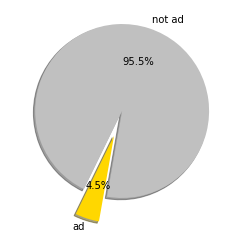

In [ ]:
# 게임 분야 광고/비광고 원그래프

ad_df_count = len(ad_df)
not_ad_df_count = len(not_ad_df)

ratio = [ad_df_count, not_ad_df_count]
labels = ['ad', 'not ad']
explode = [0.2, 0.1]
colors = ['gold','silver']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [ ]:
# 좋아요 수
group_like = total.groupby('name').like.mean()

# 싫어요 수
group_hate = total.groupby('name').hate.mean()

# 댓글 수
idx = total[total['comm_count'] =='중지'].index
total_del = total.drop(idx)
total_del['comm_count'] = pd.to_numeric(total_del['comm_count'])
group_count = total_del.groupby('name').comm_count.mean()

# 조회수
group_view = total.groupby('name').view.mean()

# 구독자 수
group_sub = total.groupby('name').sub.mean()

In [ ]:
label = ['게임은지원', '겜브링', '김재원의즐거운세상', '대도서관TV', '덕대', '도로시', '런민기', 
         '배룡TV', '악동김블루', '악어', '우왁굳', '코아TV', '테드 TV', '하창봉', '해물파전TV']

index = np.arange(len(label))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# 좋아요 수
group_like = group_like.sort_values(ascending=False)
group_like
label = ['악동김블루','김재원', '우왁굳', '겜브링', '덕대', '코아TV', '테드 TV', '런민기', 
         '은지원', '대도서관TV', '악어', '하창봉', '도로시', '해물파전TV', '배룡TV']
index = np.arange(len(label))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
group_like

name
악동 김블루                 14644.565217
김재원의 즐거운 세상            12455.844156
우왁굳의 게임방송               6593.276090
덕대-DD film              5122.092664
겜브링 GGAM BRING          4910.112853
코아 TV                   4866.246851
테드TV                    4150.703552
런민기                     3858.661376
G-ZONE 게임은지원            3388.888889
대도서관TV (buzzbean11)     1859.229000
악어 유튜브                  1646.532000
하창봉                     1485.744863
도로시Games                 898.834225
해물파전TV                   485.725309
배룡 TV                    167.500000
Name: like, dtype: float64

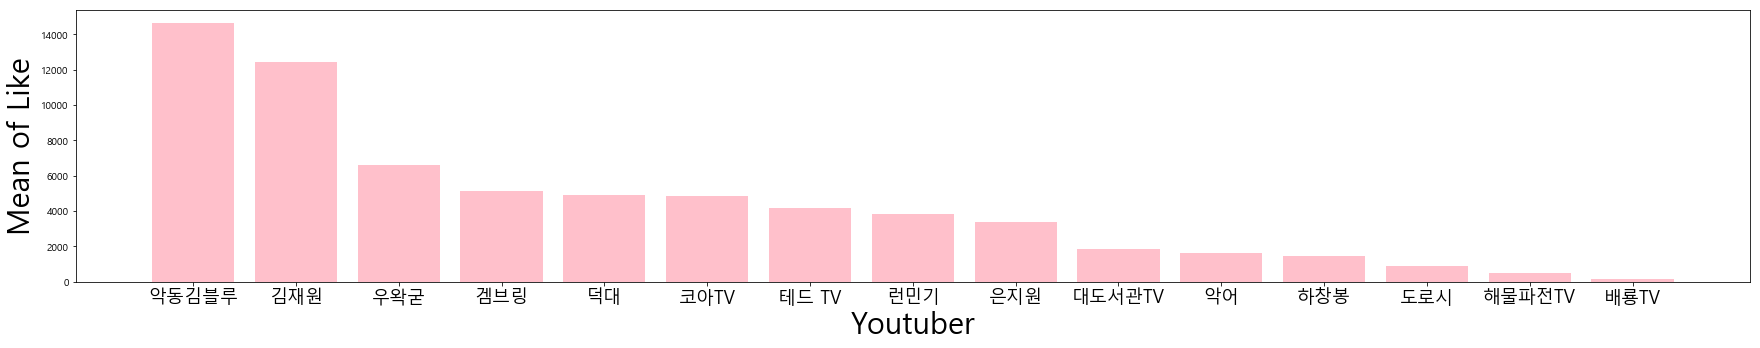

In [ ]:
plt.figure(figsize=(30, 5))
plt.bar(index, group_like, color='pink')

plt.xlabel('Youtuber', fontsize=30)
plt.ylabel('Mean of Like', fontsize=30)

plt.xticks(index, label, fontsize=18)
plt.show()

In [ ]:
# 싫어요 수
label = ['덕대','김재원','겜브링','악동김블루', '테드TV', '런민기', 
         '우왁굳', '코아TV','하창봉', '대도서관TV', '은지원', '도로시', '악어', '해물파전TV', '배룡TV']
index = np.arange(len(label))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
group_hate = group_hate.sort_values(ascending=False)
group_hate

name
덕대-DD film             1720.536680
김재원의 즐거운 세상             369.754690
겜브링 GGAM BRING          340.968652
악동 김블루                  310.127717
테드TV                    195.121585
런민기                     173.978836
우왁굳의 게임방송               172.056803
코아 TV                   149.304786
하창봉                      59.404110
대도서관TV (buzzbean11)      50.202000
G-ZONE 게임은지원             42.444444
도로시Games                 39.631016
악어 유튜브                   38.116000
해물파전TV                   25.214506
배룡 TV                     7.058333
Name: hate, dtype: float64

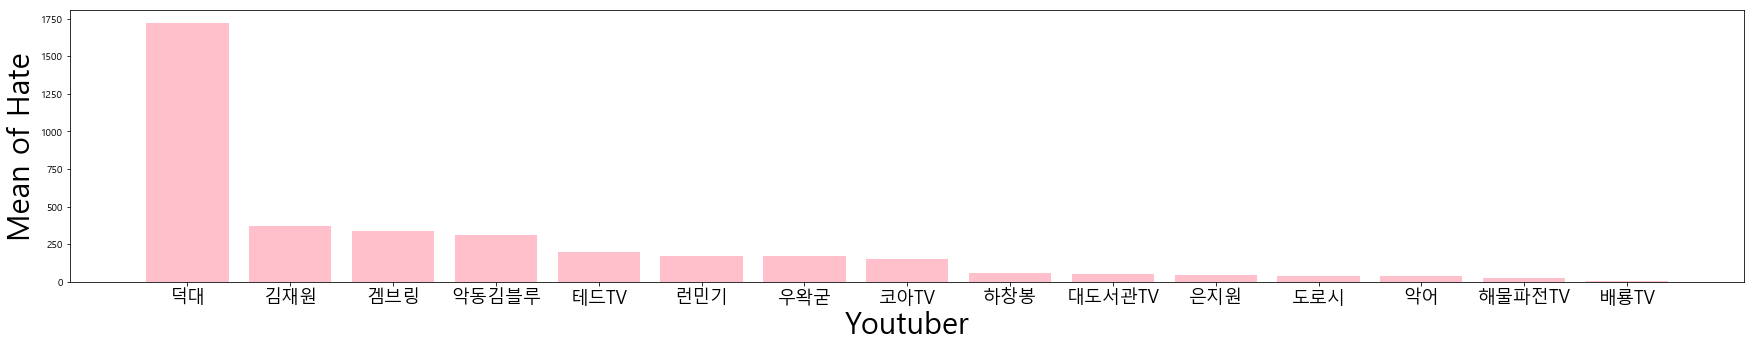

In [ ]:
plt.figure(figsize=(30, 5))
plt.bar(index, group_hate, color='pink')

plt.xlabel('Youtuber', fontsize=30)
plt.ylabel('Mean of Hate', fontsize=30)

plt.xticks(index, label, fontsize=18)
plt.show()

In [ ]:
# 댓글 수
label = ['김재원', '악동김블루','런민기', '테드TV', '겜블링',
         '우왁굳', '코아TV','은지원', '하창봉', '악어',  '도로시', '덕대' , '대도서관TV', '해물파전TV', '배룡TV']
index = np.arange(len(label))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
group_count = group_count.sort_values(ascending=False)
group_count

name
김재원의 즐거운 세상            2615.676301
악동 김블루                 1833.084239
런민기                    1120.555556
테드TV                   1107.017760
겜브링 GGAM BRING         1062.467615
우왁굳의 게임방송              1027.116248
코아 TV                   903.531486
G-ZONE 게임은지원            423.888889
하창봉                     347.496564
악어 유튜브                  253.694695
도로시Games                238.502674
덕대-DD film              149.854167
대도서관TV (buzzbean11)     145.021000
해물파전TV                   95.777434
배룡 TV                    54.866667
Name: comm_count, dtype: float64

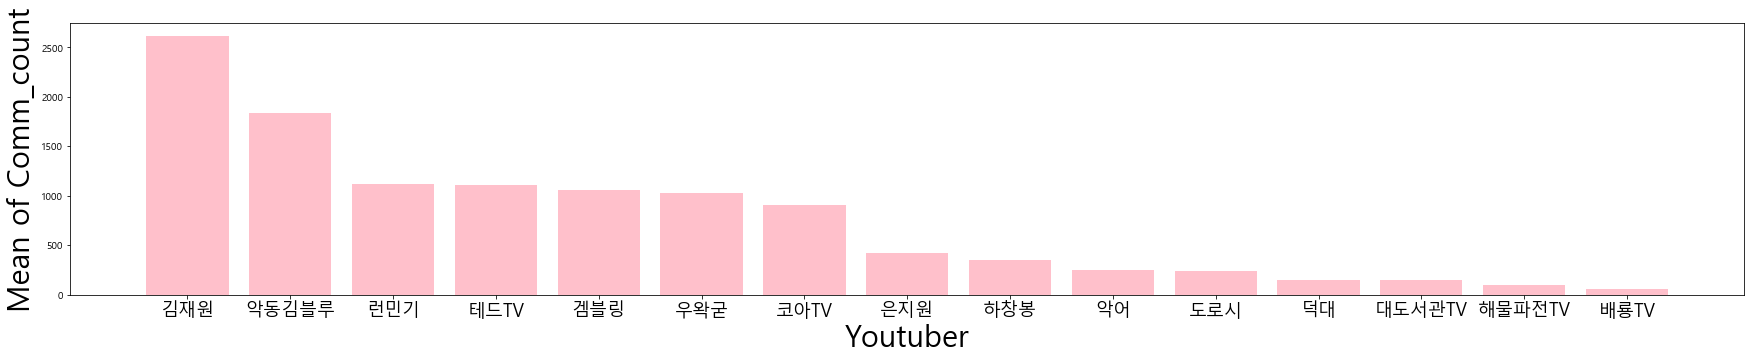

In [ ]:
plt.figure(figsize=(30, 5))
plt.bar(index, group_count, color='pink')

plt.xlabel('Youtuber', fontsize=30)
plt.ylabel('Mean of Comm_count', fontsize=30)

plt.xticks(index, label, fontsize=18)
plt.show()

In [ ]:
# 구독자 수
label = ['악동김블루','대도서관TV', '김재원', '덕대', '악어', '우왁굳', '겜브링', 
         '테드TV', '코아TV', '해물파전TV', '하창봉', '도로시', '런민기', '은지원', '배룡TV']
index = np.arange(len(label))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
group_sub = group_sub.sort_values(ascending=False)
group_sub

name
악동 김블루                 1770000
대도서관TV (buzzbean11)    1750000
김재원의 즐거운 세상            1620000
덕대-DD film             1420000
악어 유튜브                 1260000
우왁굳의 게임방송              1090000
겜브링 GGAM BRING         1020000
테드TV                    968000
코아 TV                   633000
해물파전TV                  389000
하창봉                     347000
도로시Games                342000
런민기                     217000
G-ZONE 게임은지원            143000
배룡 TV                   104000
Name: sub, dtype: int64

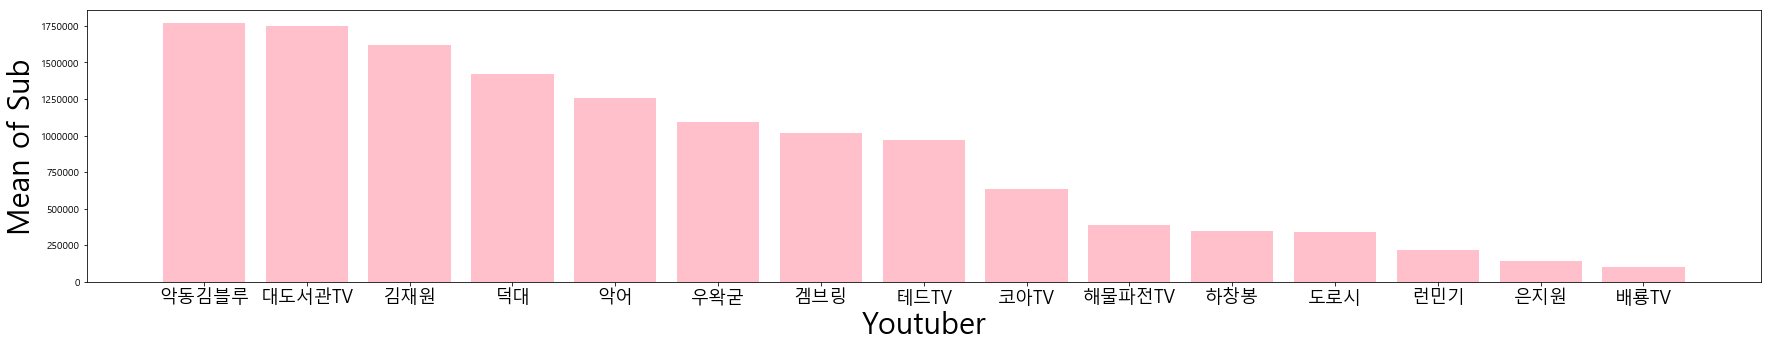

In [ ]:
plt.figure(figsize=(30, 5))
plt.bar(index, group_sub, color='pink')

plt.xlabel('Youtuber', fontsize=30)
plt.ylabel('Mean of Sub', fontsize=30)

plt.xticks(index, label, fontsize=18)
plt.show()

In [ ]:
# 조회수
label = ['덕대', '악동김블루', '김재원', '우왁굳', '겜브링', '코아TV', '테드TV', 
        '런민기', '은지원', '악어', '대도서관TV', '하창봉', '도로시', '해물파전TV', '배룡TV']
index = np.arange(len(label))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
group_view = group_view.sort_values(ascending=False)
group_view

name
덕대-DD film             1.403776e+06
악동 김블루                 1.088768e+06
김재원의 즐거운 세상            8.845799e+05
우왁굳의 게임방송              4.739049e+05
겜브링 GGAM BRING         4.149274e+05
코아 TV                  4.089755e+05
테드TV                   4.022779e+05
런민기                    3.702780e+05
G-ZONE 게임은지원           1.595182e+05
악어 유튜브                 1.182154e+05
대도서관TV (buzzbean11)    1.105195e+05
하창봉                    1.067502e+05
도로시Games               8.623332e+04
해물파전TV                 7.568136e+04
배룡 TV                  2.060345e+04
Name: view, dtype: float64

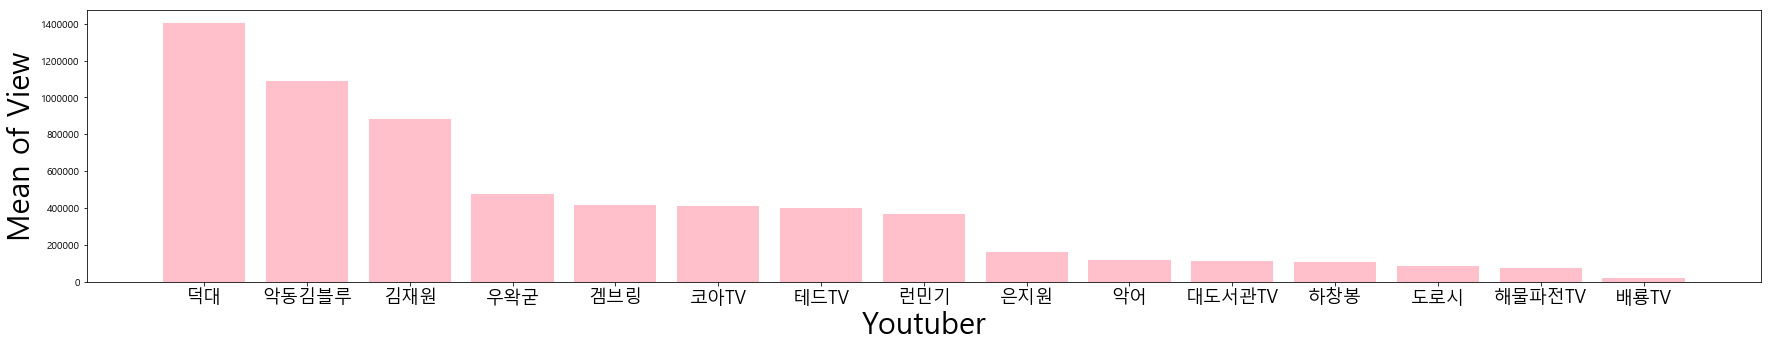

In [ ]:
plt.figure(figsize=(30, 5))
plt.bar(index, group_view, color='pink')

plt.xlabel('Youtuber', fontsize=30)
plt.ylabel('Mean of View', fontsize=30)

plt.xticks(index, label, fontsize=18)
plt.show()

In [ ]:
group_ad = total.groupby('name').ad.mean()
group_ad = group_ad.sort_values(ascending=False)
group_ad

name
G-ZONE 게임은지원           0.259259
덕대-DD film             0.243243
배룡 TV                  0.125000
테드TV                   0.073770
코아 TV                  0.055416
악동 김블루                 0.046196
대도서관TV (buzzbean11)    0.041000
우왁굳의 게임방송              0.038309
런민기                    0.037037
겜브링 GGAM BRING         0.029781
하창봉                    0.027397
해물파전TV                 0.024691
도로시Games               0.021390
김재원의 즐거운 세상            0.020202
악어 유튜브                 0.009000
Name: ad, dtype: float64

In [ ]:
total_del['rate'] =  total.loc[total['name'] == 'G-ZONE 게임은지원']

In [ ]:
# 광고 비율
label = ['은지원', '덕대', '배룡TV', '테드TV', '코아TV', '악동김블루', '대도서관TV', '우왁굳', '런민기', '겜브링', '하창봉'
        , '해물파전TV', '도로시', '김재원', '악어']
index = np.arange(len(label))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

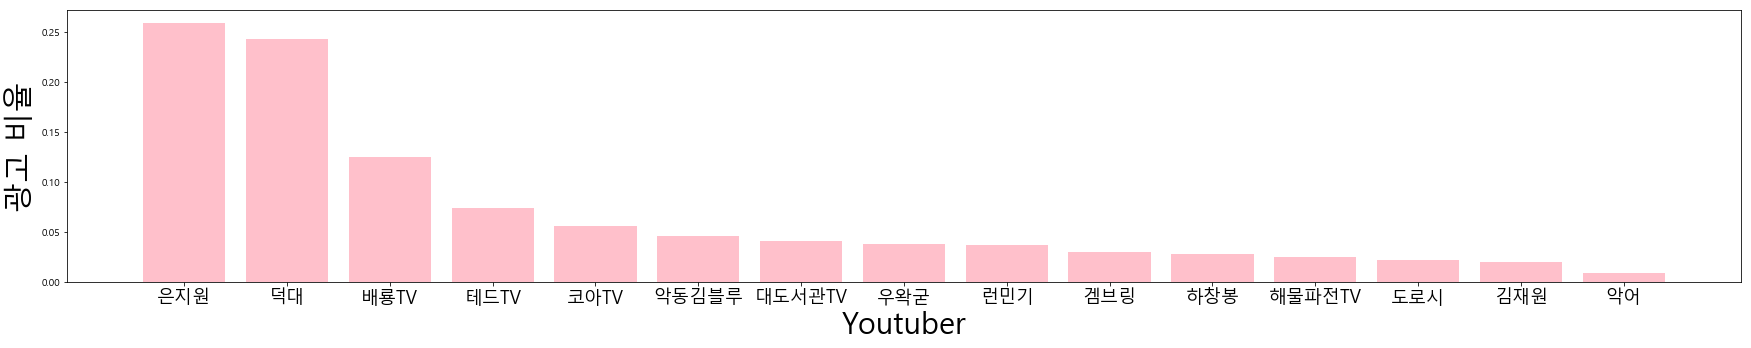

In [ ]:
plt.figure(figsize=(30, 5))
plt.bar(index, group_ad, color='pink')

plt.xlabel('Youtuber', fontsize=30)
plt.ylabel('광고 비율', fontsize=30)

plt.xticks(index, label, fontsize=18)
plt.show()

In [ ]:
total_del = total_del[['sub', 'like', 'hate', 'view', 'ad', 'comm_count']]
corr = total_del.corr(method='pearson')
print(corr)

                 sub      like      hate      view  comm_count
sub         1.000000  0.333902  0.058675  0.192739    0.216565
like        0.333902  1.000000  0.423362  0.745017    0.697198
hate        0.058675  0.423362  1.000000  0.658347    0.167184
view        0.192739  0.745017  0.658347  1.000000    0.415603
comm_count  0.216565  0.697198  0.167184  0.415603    1.000000


In [ ]:
total.loc[total['ad'] == 0]

In [ ]:
total[['ad']] = total[['ad']].replace("비광고", 0)
total[['ad']] = total[['ad']].replace("광고", 1)

In [ ]:
group_ad = total.groupby(by = ["ad"]).mean()
group_ad

id           sub         like        hate           view
ad                                                                   
0   3811.125309  1.071469e+06  4548.632720  206.376064  385479.474334
1   3841.958824  1.060979e+06  3202.988235  132.350000  253731.314706

In [ ]:
group_name = total.groupby(by = ["name"]).mean()
group_name

id        sub          like         hate  \
name                                                                
G-ZONE 게임은지원           26.5   143000.0   3388.888889    42.444444   
겜브링 GGAM BRING       5593.5  1020000.0   4910.112853   340.968652   
김재원의 즐거운 세상          2114.0  1620000.0  12455.844156   369.754690   
대도서관TV (buzzbean11)  2960.5  1750000.0   1859.229000    50.202000   
덕대-DD film           3590.0  1420000.0   5122.092664  1720.536680   
도로시Games             3813.0   342000.0    898.834225    39.631016   
런민기                  1673.0   217000.0   3858.661376   173.978836   
배룡 TV                 113.5   104000.0    167.500000     7.058333   
악동 김블루               5090.5  1770000.0  14644.565217   310.127717   
악어 유튜브               4406.5  1260000.0   1646.532000    38.116000   
우왁굳의 게임방송             552.0  1090000.0   6593.276090   172.056803   
코아 TV                6111.0   633000.0   4866.246851   149.304786   
테드TV                 7259.5   968000.0   4150.703552   195.121585   
하창봉                  6601.5   347000.0   1485.744863    59.404110   
해물파전TV               1254.5   389000.0    485.725309    25.214506   

                             view        ad  
name                                         
G-ZONE 게임은지원         1.595182e+05  0.259259  
겜브링 GGAM BRING       4.149274e+05  0.029781  
김재원의 즐거운 세상          8.845799e+05  0.020202  
대도서관TV (buzzbean11)  1.105195e+05  0.041000  
덕대-DD film           1.403776e+06  0.243243  
도로시Games             8.623332e+04  0.021390  
런민기                  3.702780e+05  0.037037  
배룡 TV                2.060345e+04  0.125000  
악동 김블루               1.088768e+06  0.046196  
악어 유튜브               1.182154e+05  0.009000  
우왁굳의 게임방송            4.739049e+05  0.038309  
코아 TV                4.089755e+05  0.055416  
테드TV                 4.022779e+05  0.073770  
하창봉                  1.067502e+05  0.027397  
해물파전TV               7.568136e+04  0.024691

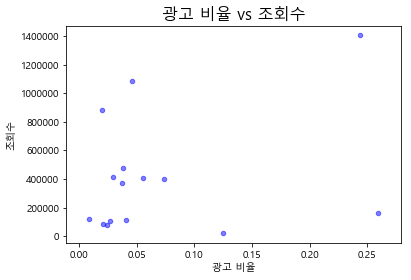

In [ ]:
group_name.plot.scatter(x='ad', y='view', marker='o',  color='blue', alpha=0.5)
plt.title('광고 비율 vs 조회수', fontsize=16)
plt.xlabel('광고 비율', fontsize=10)
plt.ylabel('조회수', fontsize=10)
plt.show()

In [ ]:
total.head(5)

id  cast          name     sub  \
0   0  game  G-ZONE 게임은지원  143000   
1   1  game  G-ZONE 게임은지원  143000   
2   2  game  G-ZONE 게임은지원  143000   
3   3  game  G-ZONE 게임은지원  143000   
4   4  game  G-ZONE 게임은지원  143000   

                                               title  like  hate    view  ad  \
0  어몽어스에서 팬미팅한 은지원ㅋㅋㅋㅋ 팬바보 은지원이 손절한 이유는?!???? | 어...  3700    38  184975   0   
1  이제부터 은지원 아니고 홀인원으로 불러주세요? 게임은지원 골프실력 전격공개! | 퍼...  1300     6   95850   1   
2  [ENG]드디어 정했습니다?? 은지원이 직접 선택한 구독자 애칭 공개!!! | 게임...  1900     8   21377   0   
3  매운맛 은지원VS순한맛 은지원! 당신의 선택에 따라 볼 수 있는 게임은지원??|롤|...  1300     7   60877   0   
4  [ENG]신발장사 할 거야? 승리를 위해 신발만 사는 은지원의 상황별 아이템 정리 ...  2000    61  203760   0   

                                           url  \
0  https://www.youtube.com/watch?v=wn-kMYIEWsQ   
1  https://www.youtube.com/watch?v=hMp7D4km5n4   
2  https://www.youtube.com/watch?v=HUR2m_whlWg   
3  https://www.youtube.com/watch?v=CGfrWv-jUy8   
4  https://www.youtube.com/watch?v=9YN7mymMWqY   

                                             comment comm_count  
0  게임 같이 했던 강호동 컨셉충이었습니다 ㅋ\n\n편집 본 언제 올라오나 기다리고 있...        330  
1  [게임은지원 X 퍼펙트스윙] 이벤트 발표\n당첨을 진심으로 축하드립니다~!!!???...        250  
2  게임은지원을 위해 반짝이는 아이디어를 내주신 모든 구독자 여러분 감사드립니다??\n...        351  
3  찌오니 은배려인거 당연히 알죠? 신중한거 잘아는 원카인을 아는 은지원이니까 원카인이...        256  
4  서버가 불안정 하다뇨,,,ㅠ 은지원 미모 실화냐ㄷㄷ 신서유기 용볼게임이랑 롤이다ㅋㅋ...        389

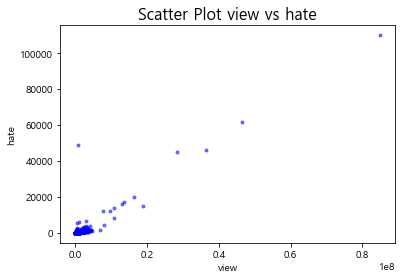

In [ ]:
# 산점도 Scatter Plot sub vs view (전체) -> 구독자 기준으론 산점도 보단 평균 막대 그래프가 좋을듯..!

plt.plot('view', 'hate', data=total, linestyle='none', marker='o', markersize=3, color='blue', alpha=0.5)
plt.title('Scatter Plot view vs hate', fontsize=16)
plt.xlabel('view', fontsize=10)
plt.ylabel('hate', fontsize=10)
plt.show()